# Doenças Cardícas
- Este notebook tem como objetivo prever a probabilidade de uma pessoa desenvolver algum tipo de doença cardíaca com base em fatores clínicos e laboratoriais.

## Descrição das Colunas

#### **1. Age (Idade)**  
Idade do indivíduo (em anos).

#### **2. Sex (Sexo)**  
Gênero do indivíduo.  
- **M**: Masculino  
- **F**: Feminino

#### **3. ChestPainType (Tipo de Dor no Peito)**  
Classificação do tipo de dor no peito, que pode indicar diferentes condições médicas, como angina (dor causada pela diminuição do fluxo de sangue para o coração).  
- **ASY**: Assintomático  
- **NAP**: Dor não anginosa  
- **ATA**: Angina atípica  
- **TA**: Angina típica

#### **4. RestingBP (Pressão Sanguínea)**
Medição da pressão sanguínea do indivíduo em repouso em mmHg(sistólica)

#### **5. Cholesterol (Colesterol)**
Medição da colesterol sérico do indivíduo (mg/dl)

#### **6. FastingBS (Açucar no Sangue)**
Medição da açucar no sangue em jejum do indivíduo (mg/dl)
- Fasting BS < 120 mg/dl = não diabético(0)
- Fasting BS >= 120 mg/dl = diabético(1)

#### **7. RestingECG (Eletrocardiograma em Reposuso)**
Eletorcardiograma em repouso do indivíduo
- Normal: Normal
- LVH: hipertrofia Ventricular Esquerda
- ST: Anormalidade da onda ST-T

#### **8. MaxHR (Frequência Cardiaca Maxima)**
Frequência Cardíaca Máxima do indivíduo

#### **9. ExerciseAngina (Angina Induzida por Exercício)**
Se o indivíduo apresentou angina induzida por exercício
- N: Não apresentou
- Y: Apresentou

#### **10. Oldpeak (Depressão de ST)**
Depressão de ST (Referência) ao ECG induzida por exercício em relação ao repouso

#### **11. ST_Slope (Inclinação do Segmento St)**
Inclinação do Segmento St no ECG
- Flat: Plano
- Up: Para cima
- Down: Para baixo

#### **12. HeartDisease (Doença Cardíaca)**
Se o indivíduo possui ou não doença cardíaca
- 0: Não possui
- 1: Posui

# Importando as bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
 
sns.set_style("whitegrid")
sns.set_palette("RdBu")

# Importando a Base de Dados

In [348]:
df = pd.read_csv('heart.csv', sep=',', encoding='iso-8859-1')

# Informações da Base

In [349]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [351]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [352]:
df.shape

(918, 12)

# Analisando as colunas

## Categoricas

In [353]:
categoricas = df.select_dtypes(include='object').columns

In [354]:
for i in categoricas:
    display(df[i].value_counts())

Sex
M    725
F    193
Name: count, dtype: int64

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

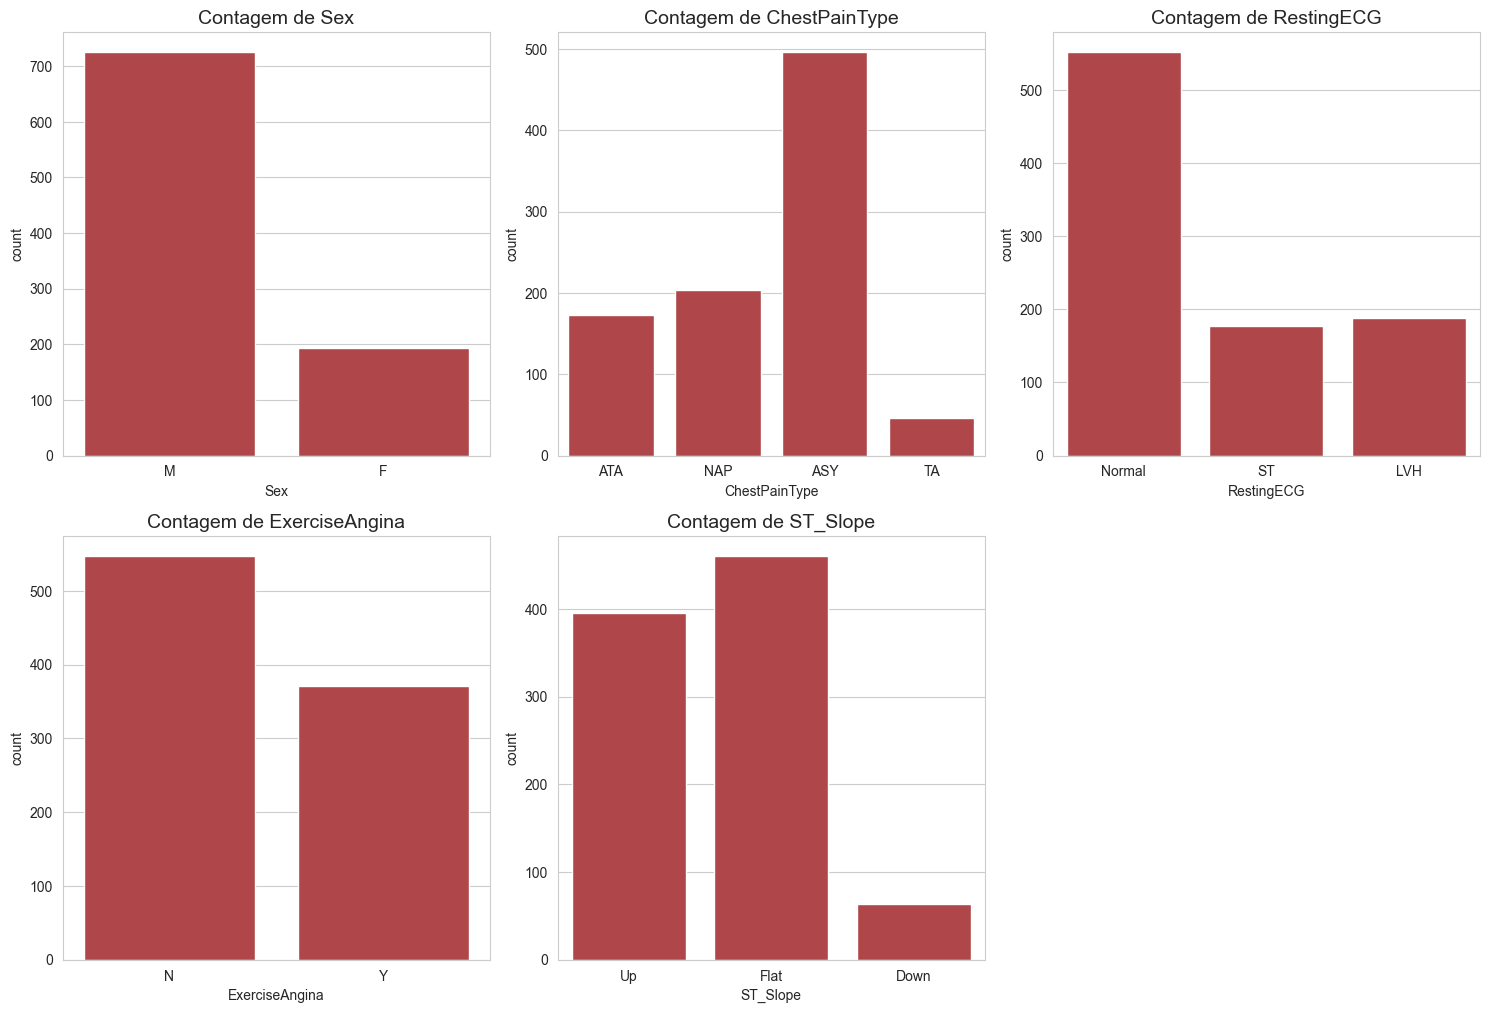

In [355]:
num_cols=3
num_rows = (len(categoricas) + num_cols-1)

fig,ax = plt.subplots(num_rows, num_cols, figsize=(15,5 * num_rows))
ax = ax.flatten()

for i, col in enumerate(categoricas):
    sns.countplot(df, x=col, ax=ax[i])
    ax[i].set_title(f'Contagem de {col}', fontsize='14')
    
for i in range(len(categoricas), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

## Numericas

In [356]:
numericas = df.drop('HeartDisease',axis=1).select_dtypes(include='number').columns

In [357]:
for i in numericas:
    display(df[i].value_counts().sort_index())

Age
28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: count, dtype: int64

RestingBP
0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: count, Length: 67, dtype: int64

Cholesterol
0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: count, Length: 222, dtype: int64

FastingBS
0    704
1    214
Name: count, dtype: int64

MaxHR
60     1
63     1
67     1
69     1
70     1
      ..
190    2
192    1
194    1
195    1
202    1
Name: count, Length: 119, dtype: int64

Oldpeak
-2.6      1
-2.0      1
-1.5      1
-1.1      1
-1.0      2
-0.9      1
-0.8      1
-0.7      1
-0.5      2
-0.1      2
 0.0    368
 0.1     14
 0.2     22
 0.3     11
 0.4     11
 0.5     19
 0.6     14
 0.7      7
 0.8     16
 0.9      4
 1.0     86
 1.1      7
 1.2     26
 1.3      7
 1.4     18
 1.5     53
 1.6     16
 1.7      6
 1.8     17
 1.9      7
 2.0     76
 2.1      2
 2.2      5
 2.3      2
 2.4      4
 2.5     16
 2.6      7
 2.8      7
 2.9      1
 3.0     28
 3.1      1
 3.2      2
 3.4      3
 3.5      2
 3.6      4
 3.7      1
 3.8      1
 4.0      8
 4.2      2
 4.4      1
 5.0      1
 5.6      1
 6.2      1
Name: count, dtype: int64

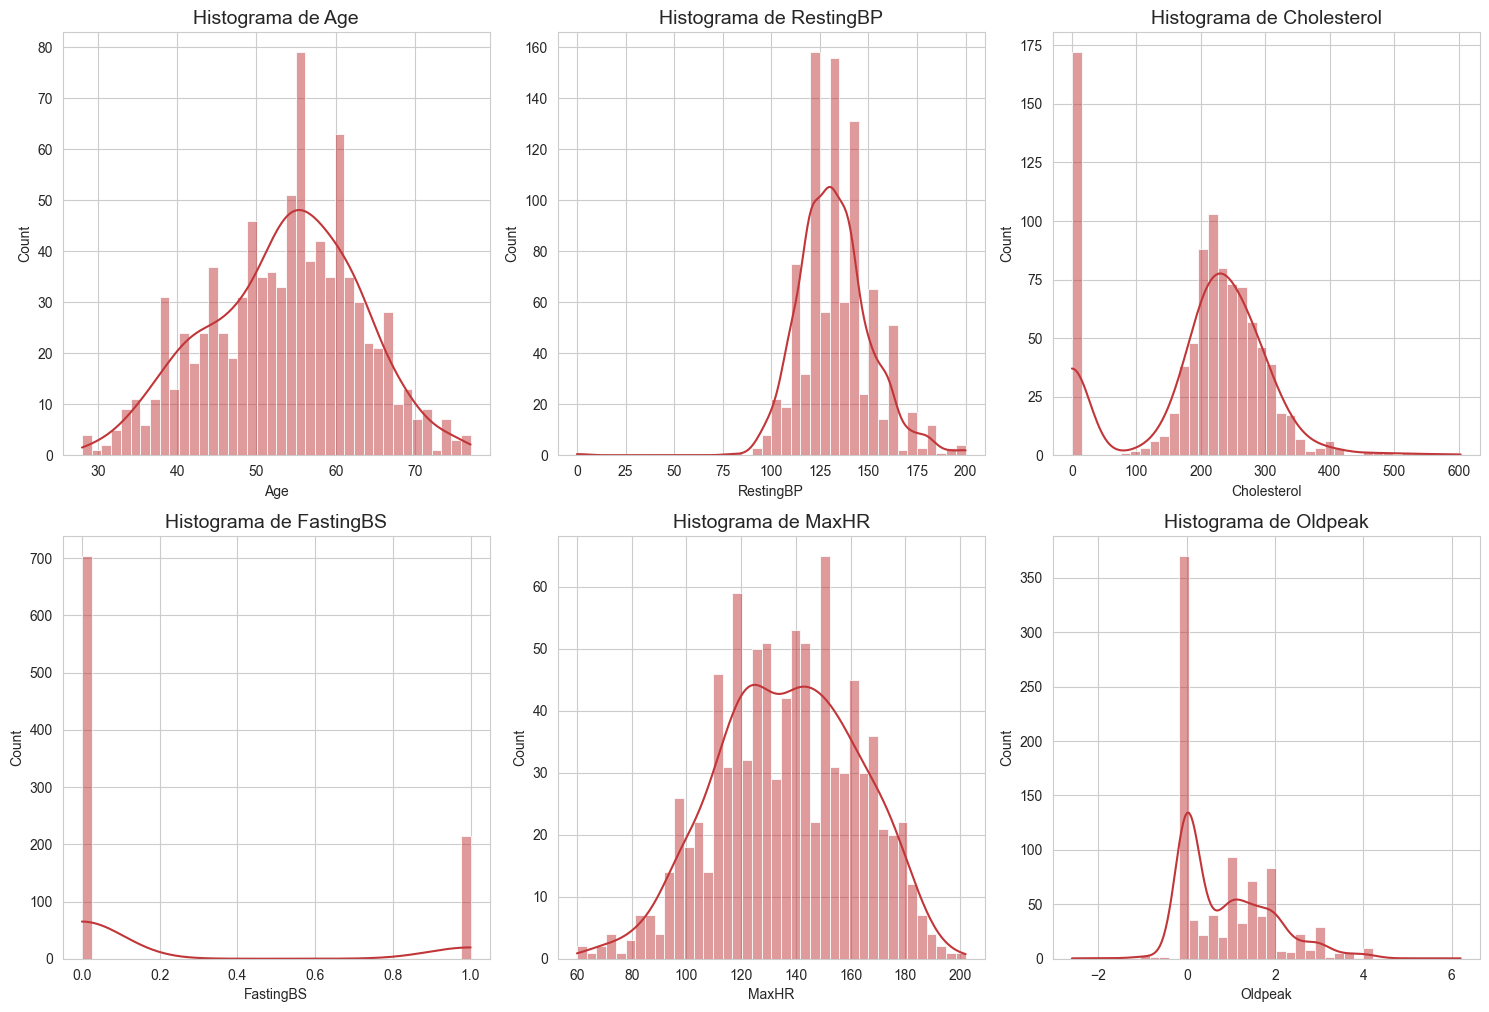

In [358]:
num_cols=3
num_rows = (len(numericas)+num_cols-1)

fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
ax = ax.flatten()

for i, col in enumerate(numericas):
    sns.histplot(data=df, x=col, bins=40, kde=True, stat='count', ax=ax[i])
    ax[i].set_title(f'Histograma de {col}', fontsize=14)

for i in range(len(numericas), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

## Coluna Target

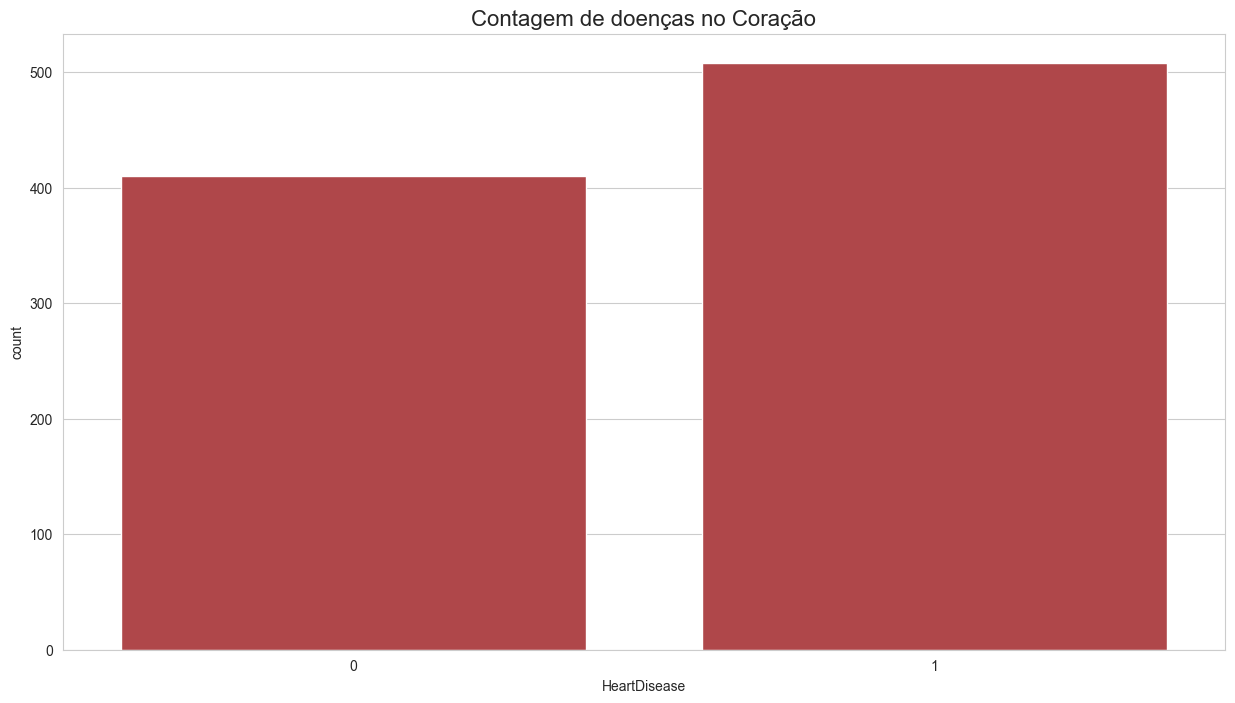

In [359]:
plt.figure(figsize=(15,8))

sns.countplot(df, x='HeartDisease')
plt.title('Contagem de doenças no Coração', fontsize=16)

plt.show()

## Tratamento de Inconsistências nos Dados

Durante a análise dos dados, foram identificadas algumas incoerências que precisam ser tratadas antes de prosseguir com a modelagem:

1. **Pressão Arterial (RestingBP) igual a 0:**
    Este valor é incoerente, pois a pressão arterial não pode ser igual a 0. Portanto, vamos excluir essas linhas do dataset.
2. **Colesterol igual a 0:**
    O colesterol igual a 0 também é um valor inválido. Como existem muitos registros com esse valor, vamos substituí-los pela média da coluna Cholesterol, calculada sem considerar os valores 0.


In [360]:
df = df.loc[df.RestingBP !=0]

df.Cholesterol = df.Cholesterol.replace(0, np.NaN)

df.loc[df.Cholesterol.isnull(), 'Cholesterol'] = df.Cholesterol.mean()

#### Plotando novamente as colunas alteradas:

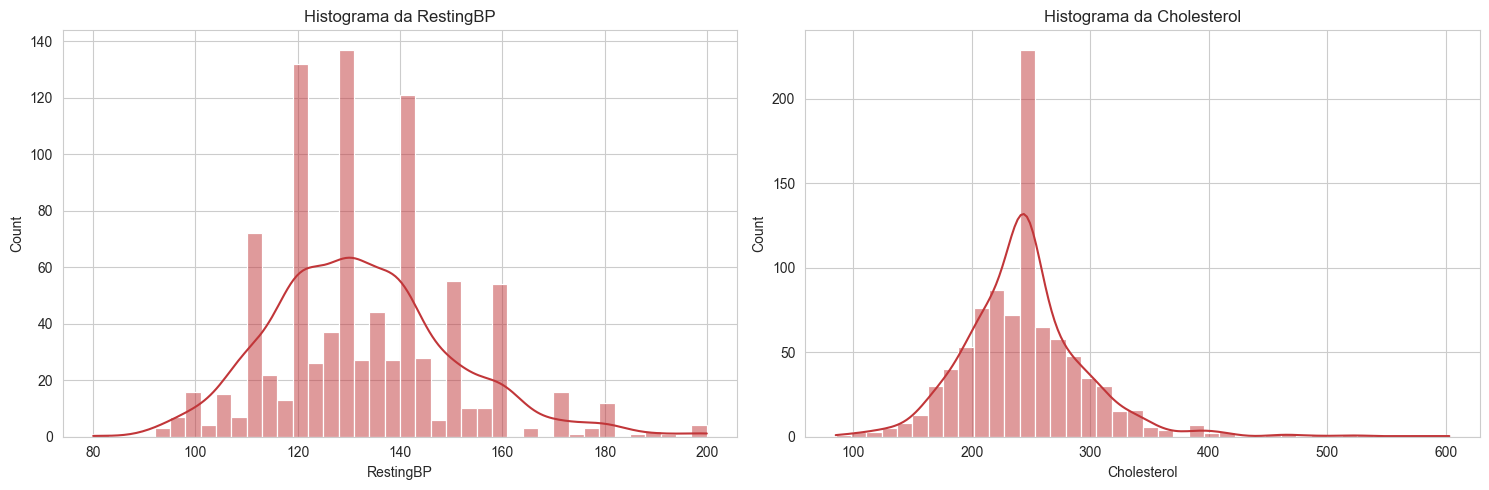

In [361]:
colunas = ['RestingBP', 'Cholesterol']
fig, ax = plt.subplots(1,2,figsize=(15,5))

for i, col in enumerate(colunas):
    sns.histplot(df, x=col, bins=40, kde=True, stat='count', ax=ax[i])
    ax[i].set_title(f'Histograma da {col}')

plt.tight_layout()
plt.show()

## Análise estatística

In [362]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.347125,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


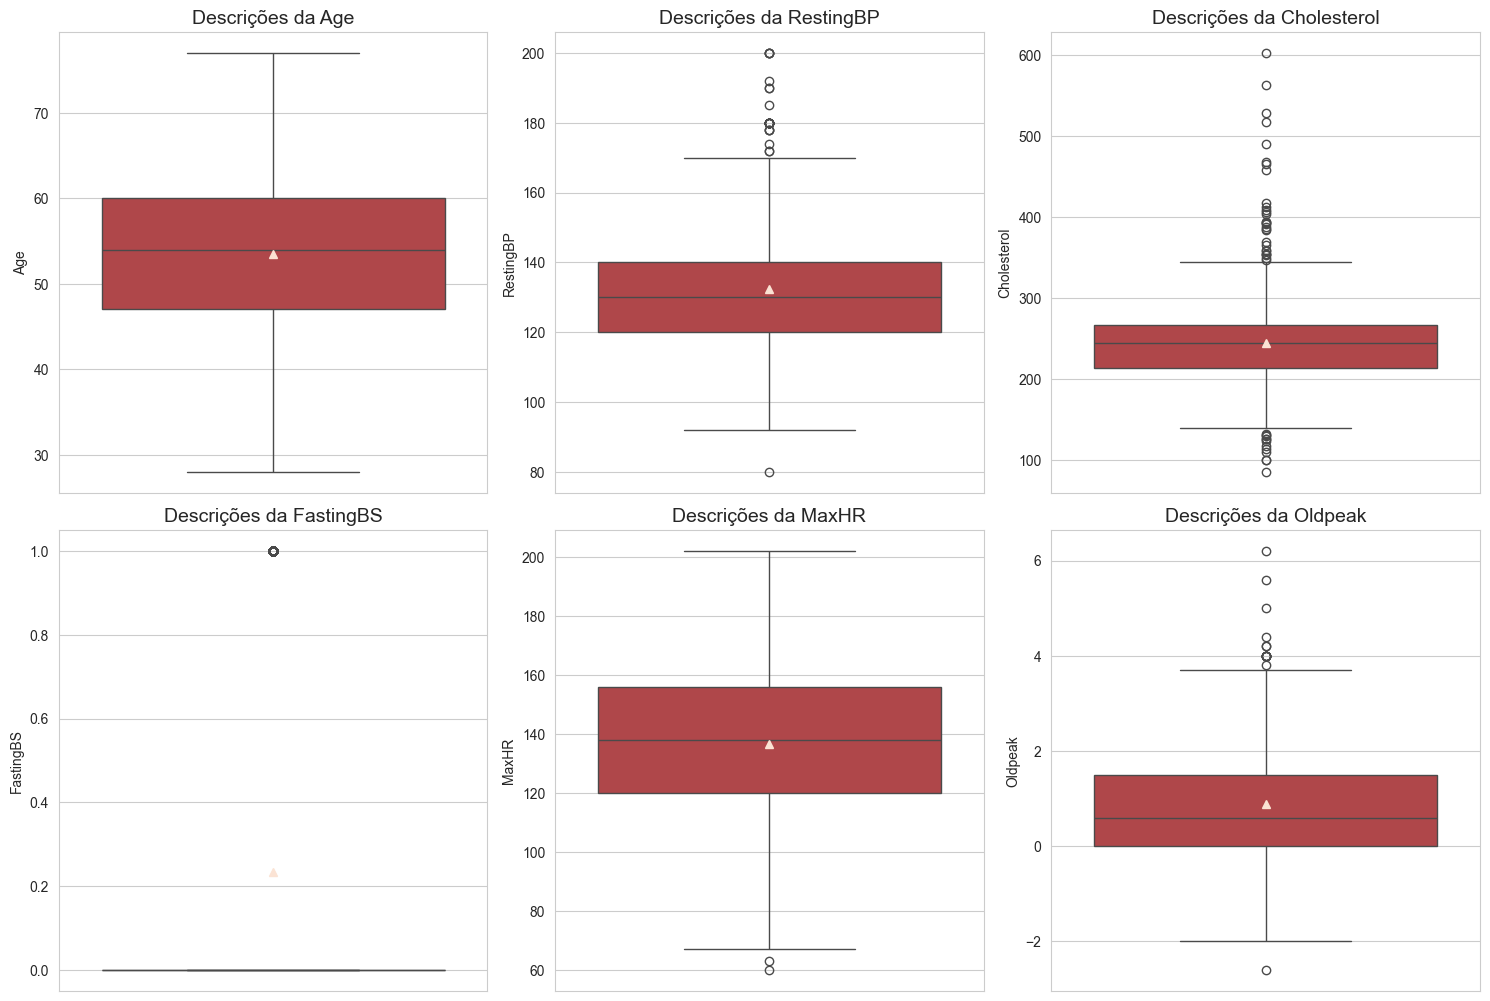

In [363]:
num_cols = 3
num_rows = (len(numericas) + num_cols-1)

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
ax = ax.flatten()

for i, col in enumerate(numericas):
    sns.boxplot(df, y=col, showmeans=True, ax=ax[i])
    ax[i].set_title(f'Descrições da {col}',fontsize=14)
    
for i in range(len(numericas), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

# Pré-Processamento dos dados

## Tansformando as variáveis categóricas em numéricas

In [364]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
 
df['Sex'] = lbe.fit_transform(df['Sex'])
df['ChestPainType'] = lbe.fit_transform(df['ChestPainType'])
df['RestingECG'] = lbe.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = lbe.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = lbe.fit_transform(df['ST_Slope'])

## Separação de Variáveis (Previsores e Alvo)

In [365]:
previsores = df.drop("HeartDisease", axis=1)
previsores.shape

(917, 11)

In [366]:
target = df['HeartDisease']

target = pd.DataFrame(target)

target.shape

(917, 1)

## Escalonamento dos Dados

In [367]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.00000,917.000000
mean,53.509269,0.789531,0.779716,132.540894,244.635389,0.233370,0.989095,136.789531,0.404580,0.886696,1.36205,0.552890
std,9.437636,0.407864,0.956193,17.999749,53.347125,0.423206,0.632016,25.467129,0.491078,1.066960,0.60727,0.497466
min,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.00000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,214.000000,0.000000,1.000000,120.000000,0.000000,0.000000,1.00000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,244.635389,0.000000,1.000000,138.000000,0.000000,0.600000,1.00000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.00000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.00000,1.000000


#### Durante a análise dos dados, foram identificadas algumas incoerências que precisam ser tratadas:

1. **Pressão Arterial (RestingBP) igual a 0:**  
   Esses valores foram excluídos do dataset.

2. **Colesterol (Cholesterol) igual a 0:**  
   Os valores de colesterol igual a 0 foram substituídos pela média dos valores não nulos.

Além disso, após a transformação das variáveis categóricas em numéricas, foi observada uma grande diferença de escalas entre as variáveis. Para resolver esse problema, optamos pela **padronização** dos dados, utilizando o desvio padrão como referência. A padronização é indicada quando as variáveis seguem uma distribuição aproximadamente normal e ajuda a melhorar o desempenho de algoritmos de aprendizado de máquina.

In [368]:
from sklearn.preprocessing import StandardScaler

In [369]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [370]:
df_previsores = pd.DataFrame(previsores_esc)
df_previsores.shape

(917, 11)

In [371]:
df_previsores.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02
mean,1.859654e-16,-7.748558e-17,7.748558e-18,7.767929e-16,-1.869340e-16,4.649135e-17,-6.198846e-17,-5.114048e-16,-1.046055e-16,7.748558e-17,3.874279e-17
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00
min,-2.704405e+00,-1.936826e+00,-8.158837e-01,-2.920572e+00,-2.994023e+00,-5.517333e-01,-1.565838e+00,-3.016886e+00,-8.243101e-01,-3.269662e+00,-2.244132e+00
25%,-6.900904e-01,5.163086e-01,-8.158837e-01,-6.971063e-01,-5.745784e-01,-5.517333e-01,1.726392e-02,-6.596226e-01,-8.243101e-01,-8.315022e-01,-5.965186e-01
50%,5.202558e-02,5.163086e-01,-8.158837e-01,-1.412398e-01,0.000000e+00,-5.517333e-01,1.726392e-02,4.755658e-02,-8.243101e-01,-2.688500e-01,-5.965186e-01
75%,6.881250e-01,5.163086e-01,1.276887e+00,4.146267e-01,4.194568e-01,-5.517333e-01,1.726392e-02,7.547357e-01,1.213136e+00,5.751284e-01,1.051095e+00
max,2.490407e+00,5.163086e-01,2.323272e+00,3.749826e+00,6.721265e+00,1.812470e+00,1.600366e+00,2.561971e+00,1.213136e+00,4.982571e+00,1.051095e+00


##### Agora, com a padronização aplicada, todos os dados estão na mesma escala, sem valores discrepantes que possam prejudicar a performance do modelo.



## Separação em treino e teste

In [372]:
from sklearn.model_selection import train_test_split

In [373]:
x_train, x_test, y_train, y_test = train_test_split(df_previsores, target, random_state=0, test_size=0.3)

# Algoritmos de Machine Learning:

## Naive Bayes

In [374]:
from sklearn.naive_bayes import GaussianNB

In [375]:
gnb = GaussianNB().fit(x_train, y_train)

### Analise dos dados de treino

In [376]:
previsoes_treino_gnb = gnb.predict(x_train)

In [377]:
print('Matriz de confusão treino:')
print(metrics.confusion_matrix(y_train, previsoes_treino_gnb))
print('')

print('Acurácia no treino: %.2f%%' % (metrics.accuracy_score(y_train, previsoes_treino_gnb) * 100))
print('')

print('Metricas treino:')
print(metrics.classification_report(y_train, previsoes_treino_gnb))

Matriz de confusão treino:
[[245  44]
 [ 57 295]]

Acurácia no treino: 84.24%

Metricas treino:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       289
           1       0.87      0.84      0.85       352

    accuracy                           0.84       641
   macro avg       0.84      0.84      0.84       641
weighted avg       0.84      0.84      0.84       641



### Analise dos dados de teste

In [378]:
y_pred_gnb = gnb.predict(x_test)

In [379]:
print('Matriz de confusão teste:')
print(metrics.confusion_matrix(y_test, y_pred_gnb))
print('')

print('Acurácia no teste: %.2f%%' % (metrics.accuracy_score(y_test, y_pred_gnb) * 100))
print('')

print('Metricas teste:')
print(metrics.classification_report(y_test, y_pred_gnb))

Matriz de confusão teste:
[[102  19]
 [ 23 132]]

Acurácia no teste: 84.78%

Metricas teste:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       121
           1       0.87      0.85      0.86       155

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



### Aplicando a validação cruzada

In [380]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [381]:
kfold = KFold(n_splits = 30, shuffle=True, random_state=5)

In [382]:
resultado_gnb = cross_val_score(gnb, df_previsores, target, cv=kfold)

In [383]:
print('Acurácia Validação Cruzada: %.2f%%' % (resultado_gnb.mean()*100))

Acurácia Validação Cruzada: 84.17%


### Avaliação do Modelo Naive Byes

O modelo apresentou bom desempenho com acurácias próximas nos dados de treino, teste e validação cruzada, indicando que ele generaliza bem.

- **Acurácia:**
  - Treino: **84.24%**
  - Teste: **84.78%**
  - Validação Cruzada: **84.17%**

- **Conclusão:**
  Não houve **overfitting** nem **underfitting**. O modelo foi **bem-sucedido** em prever a presença de doença cardíaca, com bom equilíbrio entre os conjuntos de treino, teste e validação cruzada.

## Suport Vector Machine(SVM)

In [384]:
from sklearn.svm import SVC

In [385]:
svm = SVC(kernel='rbf', random_state=42, C=1, gamma='auto').fit(x_train, y_train)

### Analise dos dados de treino

In [386]:
previsoes_treino_svm = svm.predict(x_train)

In [387]:
print('Matriz de confusão treino:')
print(metrics.confusion_matrix(y_train, previsoes_treino_svm))
print('')

print('Acurácia no treino: %.2f%%' % (metrics.accuracy_score(y_train, previsoes_treino_svm)*100))
print('')

print('Metricas treino:')
print(metrics.classification_report(y_train, previsoes_treino_svm))

Matriz de confusão treino:
[[244  45]
 [ 16 336]]

Acurácia no treino: 90.48%

Metricas treino:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       289
           1       0.88      0.95      0.92       352

    accuracy                           0.90       641
   macro avg       0.91      0.90      0.90       641
weighted avg       0.91      0.90      0.90       641



### Análise dos dados de teste

In [388]:
y_pred_svc = svm.predict(x_test)

In [389]:
print('Matriz de confusão teste:')
print(metrics.confusion_matrix(y_test, y_pred_svc))
print('')

print('Acurácia no teste: %.2f%%' % (metrics.accuracy_score(y_test, y_pred_svc)*100))
print('')

print('Metricas teste:')
print(metrics.classification_report(y_test, y_pred_svc))

Matriz de confusão teste:
[[ 98  23]
 [ 19 136]]

Acurácia no teste: 84.78%

Metricas teste:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       121
           1       0.86      0.88      0.87       155

    accuracy                           0.85       276
   macro avg       0.85      0.84      0.84       276
weighted avg       0.85      0.85      0.85       276



### Validação Cruzada

In [390]:
resultado_svm = cross_val_score(svm, df_previsores, target, cv=kfold)

In [391]:
print('Acurácia Validação Cruzada: %.2f%%' % (resultado_svm.mean()*100))

Acurácia Validação Cruzada: 86.48%


### Análise de Desempenho do Modelo SVC

O modelo SVC com kernel linear obteve os seguintes resultados:

- **Acurácia no Treino**: 90.48%
- **Acurácia no Teste**: 84.78%
- **Acurácia na Validação Cruzada**: 86.48%

### Conclusão:
A diferença entre as acurácias de treino e teste, bem como a acurácia na validação cruzada, é pequena e indica que o modelo está **generalizando bem**. O modelo não apresenta sinais claros de **overfitting**, ou  **underfitting** uma vez que o desempenho nos dados de teste e validação é consistente com o de treino. Portanto, o **modelo se saiu bem** e está ajustado adequadamente, sem problemas de overfitting.

## Logistic Regression

In [392]:
from sklearn.linear_model import LogisticRegression

In [393]:
log = LogisticRegression(random_state=42, max_iter=500, penalty='l2', 
                         tol=0.0001, C=1, solver='lbfgs').fit(x_train, y_train)

### Análise dos dados de treino

In [394]:
previsoes_treino_log = log.predict(x_train)

In [395]:
print('Matriz de confusão treino:')
print(metrics.confusion_matrix(y_train, previsoes_treino_log))
print('')

print('Acurácia no treino: %.2f%%' % (metrics.accuracy_score(y_train, previsoes_treino_log)*100))
print('')

print('Metricas treino:')
print(metrics.classification_report(y_train, previsoes_treino_log))

Matriz de confusão treino:
[[239  50]
 [ 47 305]]

Acurácia no treino: 84.87%

Metricas treino:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       289
           1       0.86      0.87      0.86       352

    accuracy                           0.85       641
   macro avg       0.85      0.85      0.85       641
weighted avg       0.85      0.85      0.85       641



### Análise dos dados de teste

In [396]:
y_pred_log = log.predict(x_test)

In [397]:
print('Matriz de confusão teste:')
print(metrics.confusion_matrix(y_test, y_pred_log))
print('')

print('Acurácia no teste: %.2f%%' % (metrics.accuracy_score(y_test, y_pred_log)*100))
print('')

print('Metricas teste:')
print(metrics.classification_report(y_test, y_pred_log))

Matriz de confusão teste:
[[100  21]
 [ 19 136]]

Acurácia no teste: 85.51%

Metricas teste:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       121
           1       0.87      0.88      0.87       155

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.86      0.85       276



### Validação Cruzada

In [398]:
resultado_log = cross_val_score(log, df_previsores, target, cv=kfold)

In [399]:
print('Acurácia Validação Cruzada: %.2f%%' % (resultado_log.mean()*100))

Acurácia Validação Cruzada: 84.51%


### Análise de Desempenho do Logistic Regression

O modelo obteve os seguintes resultados:

- *Acurácia no Treino*: 84.87%
- *Acurácia no Teste*: 85.51%
- *Acurácia na Validação Cruzada*: 84.51%

### Conclusão:
A diferença entre as acurácias de treino e teste, bem como a acurácia na validação cruzada, é pequena e indica que o modelo está generalizando bem. O modelo não apresenta sinais claros de **overfitting**, ou  **underfitting** uma vez que o desempenho nos dados de teste e validação é consistente com o de treino. Portanto, o *modelo se saiu bem e está ajustado adequadamente, sem problemas de overfitting.

## KNN

In [400]:
from sklearn.neighbors import KNeighborsClassifier

In [401]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1).fit(x_train, y_train)

### Análise dos dados de treino

In [402]:
previsoes_treino_knn = knn.predict(x_train)

In [403]:
print('Matriz de confusão treino:')
print(metrics.confusion_matrix(y_train, previsoes_treino_knn))
print('')

print('Acurácia no treino: %.2f%%' % (metrics.accuracy_score(y_train, previsoes_treino_knn)*100))
print('')

print('Metricas treino:')
print(metrics.classification_report(y_train, previsoes_treino_knn))

Matriz de confusão treino:
[[253  36]
 [ 30 322]]

Acurácia no treino: 89.70%

Metricas treino:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       289
           1       0.90      0.91      0.91       352

    accuracy                           0.90       641
   macro avg       0.90      0.90      0.90       641
weighted avg       0.90      0.90      0.90       641



### Análise dos dados de teste

In [404]:
y_pred_knn = knn.predict(x_test)

In [405]:
print('Matriz de confusão teste:')
print(metrics.confusion_matrix(y_test, y_pred_knn))
print('')

print('Acurácia no teste: %.2f%%' % (metrics.accuracy_score(y_test, y_pred_knn)*100))
print('')

print('Metricas teste:')
print(metrics.classification_report(y_test, y_pred_knn))

Matriz de confusão teste:
[[102  19]
 [ 19 136]]

Acurácia no teste: 86.23%

Metricas teste:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       121
           1       0.88      0.88      0.88       155

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



### Validação Cruzada

In [406]:
resultado_knn = cross_val_score(knn, df_previsores, target, cv=kfold)

In [407]:
print('Acurácia Validação Cruzada: %.2f%%' % (resultado_knn.mean()*100))

Acurácia Validação Cruzada: 86.25%


### Análise de Desempenho do Modelo KNN

O modelo obteve os seguintes resultados:

- *Acurácia no Treino*: 89.70%
- *Acurácia no Teste*: 86.23%
- *Acurácia na Validação Cruzada*: 86.25%

### Conclusão:
A diferença entre as acurácias de treino e teste, bem como a acurácia na validação cruzada, é pequena e indica que o modelo está generalizando bem. O modelo não apresenta sinais claros de **overfitting**, ou  **underfitting** uma vez que o desempenho nos dados de teste e validação é consistente com o de treino. Portanto, o modelo se saiu bem e está ajustado adequadamente, sem problemas de overfitting.

## Decision Tree

In [408]:
from sklearn.tree import DecisionTreeClassifier

In [409]:
arv = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=3).fit(x_train, y_train)

### Análise dos dados de treino

In [410]:
previsoes_treino_arv = arv.predict(x_train)

In [411]:
print('Matriz de confusão treino:')
print(metrics.confusion_matrix(y_train, previsoes_treino_arv))
print('')

print('Acurácia no treino: %.2f%%' % (metrics.accuracy_score(y_train, previsoes_treino_arv)*100))
print('')

print('Metricas treino:')
print(metrics.classification_report(y_train, previsoes_treino_arv))

Matriz de confusão treino:
[[233  56]
 [ 30 322]]

Acurácia no treino: 86.58%

Metricas treino:
              precision    recall  f1-score   support

           0       0.89      0.81      0.84       289
           1       0.85      0.91      0.88       352

    accuracy                           0.87       641
   macro avg       0.87      0.86      0.86       641
weighted avg       0.87      0.87      0.87       641



### Análise dos dados de teste

In [412]:
y_pred_arv = arv.predict(x_test)

In [413]:
print('Matriz de confusão teste:')
print(metrics.confusion_matrix(y_test, y_pred_arv))
print('')

print('Acurácia no teste: %.2f%%' % (metrics.accuracy_score(y_test, y_pred_arv)*100))
print('')

print('Metricas teste:')
print(metrics.classification_report(y_test, y_pred_arv))

Matriz de confusão teste:
[[ 98  23]
 [ 22 133]]

Acurácia no teste: 83.70%

Metricas teste:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       121
           1       0.85      0.86      0.86       155

    accuracy                           0.84       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



### Validação Cruzada

In [414]:
resultado_arv = cross_val_score(arv, df_previsores, target, cv=kfold)

In [415]:
print('Acurácia Validação Cruzada: %.2f%%' % (resultado_arv.mean()*100))

Acurácia Validação Cruzada: 83.20%


### Análise de Desempenho do Modelo Decision Tree

O modelo obteve os seguintes resultados:

- Acurácia no Treino: 86.58%
- Acurácia no Teste: 83.70%
- Acurácia na Validação Cruzada: 83.20%

### Conclusão:
A diferença entre as acurácias de treino e teste, bem como a acurácia na validação cruzada, é pequena e indica que o modelo está generalizando bem. O modelo não apresenta sinais claros de ***overfitting**, ou  **underfitting** uma vez que o desempenho nos dados de teste e validação é consistente com o de treino. Portanto, o modelo se saiu bem e está ajustado adequadamente, sem problemas de overfitting.

## Random Forest

In [416]:
from sklearn.ensemble import RandomForestClassifier

In [417]:
forest = RandomForestClassifier(n_estimators=170, criterion='entropy', 
                                random_state=0, max_depth=5).fit(x_train,y_train)

### Análise dos dados de treino

In [418]:
previsoes_treino_forest = forest.predict(x_train)

In [419]:
print('Matriz de confusão treino:')
print(metrics.confusion_matrix(y_train, previsoes_treino_forest))
print('')

print('Acurácia no treino: %.2f%%' % (metrics.accuracy_score(y_train, previsoes_treino_forest)*100))
print('')

print('Metricas treino:')
print(metrics.classification_report(y_train, previsoes_treino_forest))

Matriz de confusão treino:
[[253  36]
 [ 19 333]]

Acurácia no treino: 91.42%

Metricas treino:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       289
           1       0.90      0.95      0.92       352

    accuracy                           0.91       641
   macro avg       0.92      0.91      0.91       641
weighted avg       0.91      0.91      0.91       641



### Análise dos dados de teste

In [420]:
y_pred_forest = forest.predict(x_test)

In [421]:
print('Matriz de confusão teste:')
print(metrics.confusion_matrix(y_test, y_pred_forest))
print('')

print('Acurácia no teste: %.2f%%' % (metrics.accuracy_score(y_test, y_pred_forest)*100))
print('')

print('Metricas teste:')
print(metrics.classification_report(y_test, y_pred_forest))

Matriz de confusão teste:
[[105  16]
 [ 21 134]]

Acurácia no teste: 86.59%

Metricas teste:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       121
           1       0.89      0.86      0.88       155

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276



### Validação Cruzada

In [422]:
resultado_forest = cross_val_score(forest, df_previsores, target, cv=kfold)

In [423]:
print('Acurácia Validação Cruzada: %.2f%%' % (resultado_forest.mean()*100))

Acurácia Validação Cruzada: 86.36%


### Análise de Desempenho do Modelo Random Forest

O modelo obteve os seguintes resultados:

- Acurácia no Treino: 91.42%
- Acurácia no Teste: 86.59%
- Acurácia na Validação Cruzada: 86.47%

### Conclusão:
A diferença entre as acurácias de treino e teste, bem como a acurácia na validação cruzada, é pequena e indica que o modelo está generalizando bem. O modelo não apresenta sinais claros de **overfitting**, ou  **underfitting** uma vez que o desempenho nos dados de teste e validação é consistente com o de treino. Portanto, o modelo se saiu bem e está ajustado adequadamente, sem problemas de overfitting.

## XGBoost

In [424]:
from xgboost import XGBClassifier

In [425]:
xgb = XGBClassifier(max_depth=2, objective='reg:logistic', 
                    n_estimators= 200, learning_rate=0.07, random_state=1).fit(x_train, y_train)

### Análise dos dados de treino

In [426]:
previsoes_treino_xgb = xgb.predict(x_train)

In [427]:
print('Matriz de confusão treino:')
print(metrics.confusion_matrix(y_train, previsoes_treino_xgb))
print('')

print('Acurácia no treino: %.2f%%' % (metrics.accuracy_score(y_train, previsoes_treino_xgb)*100))
print('')

print('Metricas treino:')
print(metrics.classification_report(y_train, previsoes_treino_xgb))

Matriz de confusão treino:
[[253  36]
 [ 19 333]]

Acurácia no treino: 91.42%

Metricas treino:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       289
           1       0.90      0.95      0.92       352

    accuracy                           0.91       641
   macro avg       0.92      0.91      0.91       641
weighted avg       0.91      0.91      0.91       641



### Análise dos dados de teste

In [428]:
y_pred_xgb = xgb.predict(x_test)

In [429]:
print('Matriz de confusão teste:')
print(metrics.confusion_matrix(y_test, y_pred_xgb))
print('')

print('Acurácia no teste: %.2f%%' % (metrics.accuracy_score(y_test, y_pred_xgb)*100))
print('')

print('Metricas teste:')
print(metrics.classification_report(y_test, y_pred_xgb))

Matriz de confusão teste:
[[103  18]
 [ 18 137]]

Acurácia no teste: 86.96%

Metricas teste:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       121
           1       0.88      0.88      0.88       155

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



### Validação Cruzada

In [430]:
resultado_xgd = cross_val_score(xgb, df_previsores, target, cv=kfold)

In [431]:
print('Acurácia Validação Cruzada: %.2f%%' % (resultado_xgd.mean()*100))

Acurácia Validação Cruzada: 86.80%


### Análise de Desempenho do Modelo XGBoost

O modelo obteve os seguintes resultados:

- Acurácia no Treino: 91.42%
- Acurácia no Teste: 86.96%
- Acurácia na Validação Cruzada: 86.80%

### Conclusão:
A diferença entre as acurácias de treino e teste, bem como a acurácia na validação cruzada, é pequena e indica que o modelo está generalizando bem. O modelo não apresenta sinais claros de **overfitting**, ou  **underfitting** uma vez que o desempenho nos dados de teste e validação é consistente com o de treino. Portanto, o modelo se saiu bem e está ajustado adequadamente, sem problemas de overfitting.

## LightGBM

In [432]:
import lightgbm as lgb

In [433]:
#Dataset para treino
df_lgb = lgb.Dataset(x_train, label=y_train)

In [434]:
parametros_lgb = {
    'num_leaves': 100, 
    'objective': 'binary',
    'max_depth': 2,
    'max_bin': 200, 
    'learning_rate': 0.03,
    'verbosity': -1  
}

In [435]:
lgb.train(parametros_lgb, df_lgb, num_boost_round=200)

### Análise dos dados de treino

In [436]:
previsoes_treino_lgbm = lgbm.predict(x_train)

In [437]:
previsoes_treino_lgbm.shape

(641,)

In [438]:
for i in range(0, 641):
    if previsoes_treino_lgbm[i] >= 0.5:
        previsoes_treino_lgbm[i] = 1
    else:
        previsoes_treino_lgbm[i] = 0

In [439]:
print('Matriz de confusão treino:')
print(metrics.confusion_matrix(y_train, previsoes_treino_lgbm))
print('')

print('Acurácia no treino: %.2f%%' % (metrics.accuracy_score(y_train, previsoes_treino_lgbm)*100))
print('')

print('Metricas treino:')
print(metrics.classification_report(y_train, previsoes_treino_lgbm))

Matriz de confusão treino:
[[248  41]
 [ 26 326]]

Acurácia no treino: 89.55%

Metricas treino:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       289
           1       0.89      0.93      0.91       352

    accuracy                           0.90       641
   macro avg       0.90      0.89      0.89       641
weighted avg       0.90      0.90      0.90       641



### Análise dos dados de teste

In [440]:
y_pred_lgbm = lgbm.predict(x_test)

In [441]:
y_pred_lgbm.shape

(276,)

In [442]:
#Os valores do lgbm não são de 0 e 1, por isso temos que organizalos
for i in range(0, 276):
    if y_pred_lgbm[i] >= 0.5:
        y_pred_lgbm[i] = 1
    else:
        y_pred_lgbm[i] = 0

In [443]:
print('Matriz de confusão teste:')
print(metrics.confusion_matrix(y_test, y_pred_lgbm))
print('')

print('Acurácia no teste: %.2f%%' % (metrics.accuracy_score(y_test, y_pred_lgbm)*100))
print('')

print('Metricas teste:')
print(metrics.classification_report(y_test, y_pred_lgbm))

Matriz de confusão teste:
[[101  20]
 [ 18 137]]

Acurácia no teste: 86.23%

Metricas teste:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       121
           1       0.87      0.88      0.88       155

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



### Validação Cruzada

In [444]:
modelo_lgbm = lgb.LGBMClassifier(**parametros_lgb)
resultado_lgbm = cross_val_score(modelo_lgbm, df_previsores, target, cv=kfold)

In [445]:
print('Acurácia média: %.2f%%' % (resultado_lgbm.mean()*100))

Acurácia média: 85.28%


### Análise de Desempenho do Modelo LightGBM

O modelo obteve os seguintes resultados:

- Acurácia no Treino: 89.55%
- Acurácia no Teste: 86.23%
- Acurácia na Validação Cruzada: 85.27%

### Conclusão:
A diferença entre as acurácias de treino e teste, bem como a acurácia na validação cruzada, é pequena e indica que o modelo está generalizando bem. O modelo não apresenta sinais claros de **overfitting**, ou  **underfitting** uma vez que o desempenho nos dados de teste e validação é consistente com o de treino. Portanto, o modelo se saiu bem e está ajustado adequadamente, sem problemas de overfitting.

## CatBoost

In [446]:
from catboost import CatBoostClassifier

In [447]:
cat = CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.1, max_depth=5,
                        random_state=5, eval_metric='Accuracy').fit(x_train, y_train,
                        verbose=0, eval_set=(x_test, y_test))

### Análise dos dados de treino

In [448]:
previsoes_treino_cat = cat.predict(x_train)

In [449]:
print('Matriz de confusão treino:')
print(metrics.confusion_matrix(y_train, previsoes_treino_cat))
print('')

print('Acurácia no treino: %.2f%%' % (metrics.accuracy_score(y_train, previsoes_treino_cat)*100))
print('')

print('Metricas treino:')
print(metrics.classification_report(y_train, previsoes_treino_cat))

Matriz de confusão treino:
[[253  36]
 [ 18 334]]

Acurácia no treino: 91.58%

Metricas treino:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       289
           1       0.90      0.95      0.93       352

    accuracy                           0.92       641
   macro avg       0.92      0.91      0.91       641
weighted avg       0.92      0.92      0.92       641



### Análise dos dados de teste

In [450]:
y_pred_cat = cat.predict(x_test)

In [451]:
print('Matriz de confusão teste:')
print(metrics.confusion_matrix(y_test, y_pred_cat))
print('')

print('Acurácia no teste: %.2f%%' % (metrics.accuracy_score(y_test, y_pred_cat)*100))
print('')

print('Metricas teste:')
print(metrics.classification_report(y_test, y_pred_cat))

Matriz de confusão teste:
[[101  20]
 [ 16 139]]

Acurácia no teste: 86.96%

Metricas teste:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       121
           1       0.87      0.90      0.89       155

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



### Validação Cruzada

In [ ]:
resultado_cat = cross_val_score(cat, df_previsores, target, cv=kfold)

In [453]:
print('Acurácia Validação Cruzada: %.2f%%' % (resultado_cat.mean()*100))

Acurácia Validação Cruzada: 87.78%


### Análise de Desempenho do Modelo CatBoost
O modelo obteve os seguintes resultados:

- Acurácia no Treino: 91.58%
- Acurácia no Teste: 86.96%
- Acurácia na Validação Cruzada: 87.56%

### Conclusão:
A diferença entre as acurácias de treino e teste, bem como a acurácia na validação cruzada, é pequena e indica que o modelo está generalizando bem. O modelo não apresenta sinais claros de **overfitting**, ou  **underfitting** uma vez que o desempenho nos dados de teste e validação é consistente com o de treino. Portanto, o modelo se saiu bem e está ajustado adequadamente, sem problemas de overfitting.

## Resultados dos Modelos de Machine Learning

#### 1. Naive Bayes
- **Treino:** 84.28%  
- **Teste:** 84.78%  
- **Validação Cruzada:** 84.17%  
- **Acertos:** 234  

---

#### 2. Support Vector Machine (SVM)
- **Treino:** 90.48%  
- **Teste:** 85.78%  
- **Validação Cruzada:** 86.48%  
- **Acertos:** 234  

---

#### 3. Regressão Logística
- **Treino:** 84.87%  
- **Teste:** 85.51%  
- **Validação Cruzada:** 84.51%  
- **Acertos:** 236  

---

#### 4. K-Nearest Neighbors (KNN)
- **Treino:** 89.70%  
- **Teste:** 86.23%  
- **Validação Cruzada:** 86.25%  
- **Acertos:** 238  

---

#### 5. Decision Tree
- **Treino:** 86.58%  
- **Teste:** 83.70%  
- **Validação Cruzada:** 83.20%  
- **Acertos:** 231  

---

#### 6. Random Forest
- **Treino:** 91.42%  
- **Teste:** 86.59%  
- **Validação Cruzada:** 86.47%  
- **Acertos:** 239  

---

#### 7. XGBoost
- **Treino:** 91.42%  
- **Teste:** 86.96%  
- **Validação Cruzada:** 86.80%  
- **Acertos:** 240  

---

#### 8. LightGBM
- **Treino:** 89.55%  
- **Teste:** 86.23%  
- **Validação Cruzada:** 85.27%  
- **Acertos:** 238  

---

#### 9. CatBoost
- **Treino:** 91.58%  
- **Teste:** 86.96%  
- **Validação Cruzada:** 87.56%  
- **Acertos:** 240


# Otimização dos Hiperparâmetros
- Nosso modelo escolhido foi o **CatBoost** por ter mais acertos junto com o XGBoost, porém seu resultado na **Validação Cruzada** foi superior.

In [454]:
from sklearn.model_selection import GridSearchCV

In [455]:
param_grid = {
    'iterations':[100, 150, 200], 
    'learning_rate':[0.02, 0.05, 0.1], 
    'max_depth':[3, 5, 7],
    'random_state':[1, 5, 42] 
}

In [456]:
grid = GridSearchCV(cat, param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=1).fit(x_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
0:	learn: 0.8533541	total: 3.99ms	remaining: 395ms
1:	learn: 0.8533541	total: 6.11ms	remaining: 300ms
2:	learn: 0.8595944	total: 9.45ms	remaining: 305ms
3:	learn: 0.8736349	total: 12.8ms	remaining: 306ms
4:	learn: 0.8751950	total: 16ms	remaining: 305ms
5:	learn: 0.8798752	total: 19.4ms	remaining: 303ms
6:	learn: 0.8829953	total: 22.3ms	remaining: 297ms
7:	learn: 0.8845554	total: 26.3ms	remaining: 303ms
8:	learn: 0.8876755	total: 28.1ms	remaining: 284ms
9:	learn: 0.8845554	total: 30.5ms	remaining: 275ms
10:	learn: 0.8845554	total: 32.9ms	remaining: 267ms
11:	learn: 0.8829953	total: 35ms	remaining: 256ms
12:	learn: 0.8814353	total: 35.7ms	remaining: 239ms
13:	learn: 0.8814353	total: 37.7ms	remaining: 231ms
14:	learn: 0.8814353	total: 40ms	remaining: 227ms
15:	learn: 0.8845554	total: 42ms	remaining: 221ms
16:	learn: 0.8861154	total: 43.9ms	remaining: 214ms
17:	learn: 0.8876755	total: 45.8ms	remaining: 209ms
18:	learn: 0.8923557

In [457]:
print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'iterations': 100, 'learning_rate': 0.1, 'max_depth': 7, 'random_state': 42}


In [458]:
resultado_final = pd.DataFrame(grid.cv_results_)
print(resultado_final.shape)

(81, 15)


### Melhores resultados

In [459]:
resultado_final.sort_values(by='mean_test_score', ascending=False).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_iterations,param_learning_rate,param_max_depth,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
26,1.019826,0.040030,0.014448,0.001563,100,0.10,7,42,"{'iterations': 100, 'learning_rate': 0.1, 'max...",0.918785,0.932064,0.931001,0.927284,0.006025,1
53,1.407755,0.047941,0.015163,0.001685,150,0.10,7,42,"{'iterations': 150, 'learning_rate': 0.1, 'max...",0.920109,0.929685,0.930377,0.926724,0.004686,2
58,1.602292,0.027912,0.013779,0.000851,200,0.02,5,5,"{'iterations': 200, 'learning_rate': 0.02, 'ma...",0.925406,0.926954,0.927796,0.926719,0.000990,3


# Conclusão Geral

O objetivo de classificar com eficiência a tendência de uma pessoa desenvolver doenças cardíacas foi alcançado. Através do ajuste dos hiperparâmetros com o GridSearchCV, o modelo obteve uma **pontuação média de teste de 92.72%**, demonstrando boa eficiência.

Portanto, conseguimos **classificar com eficiência** a tendência a doenças cardíacas, otimizando tanto o desempenho quanto o tempo de treinamento.